### <u> _**MONTE-CARLO METHODS FOR THE 2D ISING MODEL:**_

* The goal of this project is to produce numerical simulations of the 2D Ising model phase transition on a square lattice, using the Metropolis-Hastings algorithm. 
    * Validation of the algorithm will be done by study of the magnetisation(its order parameter), and energy of the model. 


### <u> The model:

We consider a 2D square lattice of spins with nearest neighbours interaction and periodic boundary conditions. This is encoded in the following Hamiltonian:

$$ H = -J \sum_{<i,j>}^{} \sigma_{i}\sigma_{j} $$

 Where : 
   * $\sigma$ is the spin state ($\pm 1$)
   * J is the coupling strength between spins. (Set to 1 in our simulations)
   * $<i,j>$ denotes the sum over nearest neighbours.

It can be shown that this system undergoes a ferromagnetic-paramagnetic phase transition at the critical temperature $Tc/J=2/log(1+\sqrt{2})≈2.26$, which expands to a region of temperature around $T_{c}$ for any finite system size.

### <u> Monte-Carlo Methods : Overview  

Monte Carlo methods are widely used in statistical physics for simulations of system at thermodynamic equilibrium. Given a system in contact with a reservoir of temperature T, the expected value of any given observable is given by. 

$$
<A> = \frac{\sum_{\alpha} A_{\alpha} e^{-\beta E_{\alpha}}}{\sum_{\alpha} e^{-\beta E_{\alpha}}}
$$

Where we sum over all the micro-states of the system, and the denominator is $Z$ the partition function of the system. Computing the sum over all the micro states is the problem at hand here, for example a rather simple system of a N = 100 spins we already have $2^{100}$ terms to evaluate which is computationnally very expensive.

The main idea behind Monte-Carlo methods is to sample the terms in the sum according to a certain probability distribution to intentionnally leave out the less meaningful one, that way we can approximate the expected value with a reasonable error and with reasonable computing power. It can be shown that the best approximation of the expected value of the observable can then be written as: 

$$
 <A> = \frac{1}{M} \frac{\sum_{m=0}^{M-1} p_{\alpha m}^{-1} A_{\alpha m } e^{-\beta E_{\alpha m}}}{Z}
$$

Where the index $m$ runs over all the selected micro-states.

In our case using the Maxwell-Boltzmann distribution we have $ p_{\alpha m} = \frac{e^{-\beta E_{\alpha m}}}{Z} $, we can rewrite our expected value as :

$$
<A>  \simeq \frac{1}{M} \sum_{m=0}^{M-1} A_{\alpha m}
$$

Monte Carlo methods are powerful because of their large range of applications, only 2 constraints needs be satisfied in order for the method to converge : Ergodicity and detailed balance.
Ergodicity means that any configuration $\nu$ of the system should be within from any other configurations $\mu$. A distribution is said to satisfy the detailed balance conditions if the following statement is true :

$$
\frac{P(\mu \rightarrow \nu)}{P(\nu \rightarrow \mu)} = \frac{p_{\nu}}{p_{\mu}}
$$

Meaning that on average there are as many transitions from $\nu$ to $\mu$ as from $\mu$ to $\nu$. In the case of the Boltzmann distribution, we can rewrite the detailed balance condition as: 

$$
\frac{P(\mu \rightarrow \nu)}{P(\nu \rightarrow \mu)} = e^{-\beta(E_{\nu}-E_{\mu})} = e^{-\beta\Delta E}
$$

With all of this we are now ready to carry on to the Metropolis algorithm.


### <u> The Metropolis Algorithm :</u> 
The Metropolis algorithm is the following:

1. Flip a random spin on the lattice.
2. Evaluate the change in energy $dE$ occuring because of this flip.
3. If $dE < 0$ the spin stays flipped.
4. If $dE > 0$ the spin stays flipped with probability $e^{-\beta dE}$, else it is flipped back.
5. Repeat 2-4 for all the spins on the lattice until equilibrium is reached.


It is straightforward to show that the Metropolis algorithm satisfies both the detailed balance and the ergodicity condition. Implementation of the algorithm is done below.  

### **_Simulation:_**

In [2]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import math 
import scienceplots
plt.style.use(['science','notebook','ieee'])

In [3]:
def get_initial_configuration(N):
    return 2*np.random.randint(0,2, size=(N,N))-1

def monte_carlo_step(config,beta,J = 1): # Makes a single step of the simulation.
    L = config.shape[0]
    for a in range(L):
        for b in range(L):
            i,j = np.random.randint(0,L, size=2)
            s = config[i,j]

            neighbours  = config[(i+1)%L,j] + config[i,(j+1)%L] + config[(i-1)%L,j] + config[i,(j-1)%L]
            dE = 2*J*neighbours*s 

            if dE<=0: 
                s *= -1
            elif random.random() < np.exp(-beta*dE):
                s *= -1

            config[i,j] = s 

    return config

def compute_magnetization(config):
    return np.sum(config)

def compute_energy(config,J = 1):
    L = config.shape[0]
    E = 0
    for i in range(L):
        for j in range(L):
            s = config[i,j]
            neighbours  = config[(i+1)%L,j] + config[i,(j+1)%L] + config[(i-1)%L,j] + config[i,(j-1)%L]
            dE = -J*neighbours*s 
            E += dE
    return E/4
    
            


In [13]:
N = 50 # Size of the lattice (NxN)
T = np.linspace(1,3,21) # Temperature Array
betas = 1/T 
M = np.zeros(len(T))
E = np.zeros(len(T))


steps = 1024


for j,beta in enumerate(betas):
    initial_state = get_initial_configuration(N)
    magnetization = 0 
    energy = 0
    for k in range(2**8): # First we reach equilibrium before sampling the Markov Chain.
        monte_carlo_step(initial_state,beta = beta)
    for k in range(1024): #Then we compute the magnetization for a number of states.
        monte_carlo_step(initial_state,beta = beta)
        magnetization += compute_magnetization(initial_state)
        energy += compute_energy(initial_state)
    M[j] = magnetization/steps
    E[j] = energy/steps

Text(0, 0.5, 'Energy')

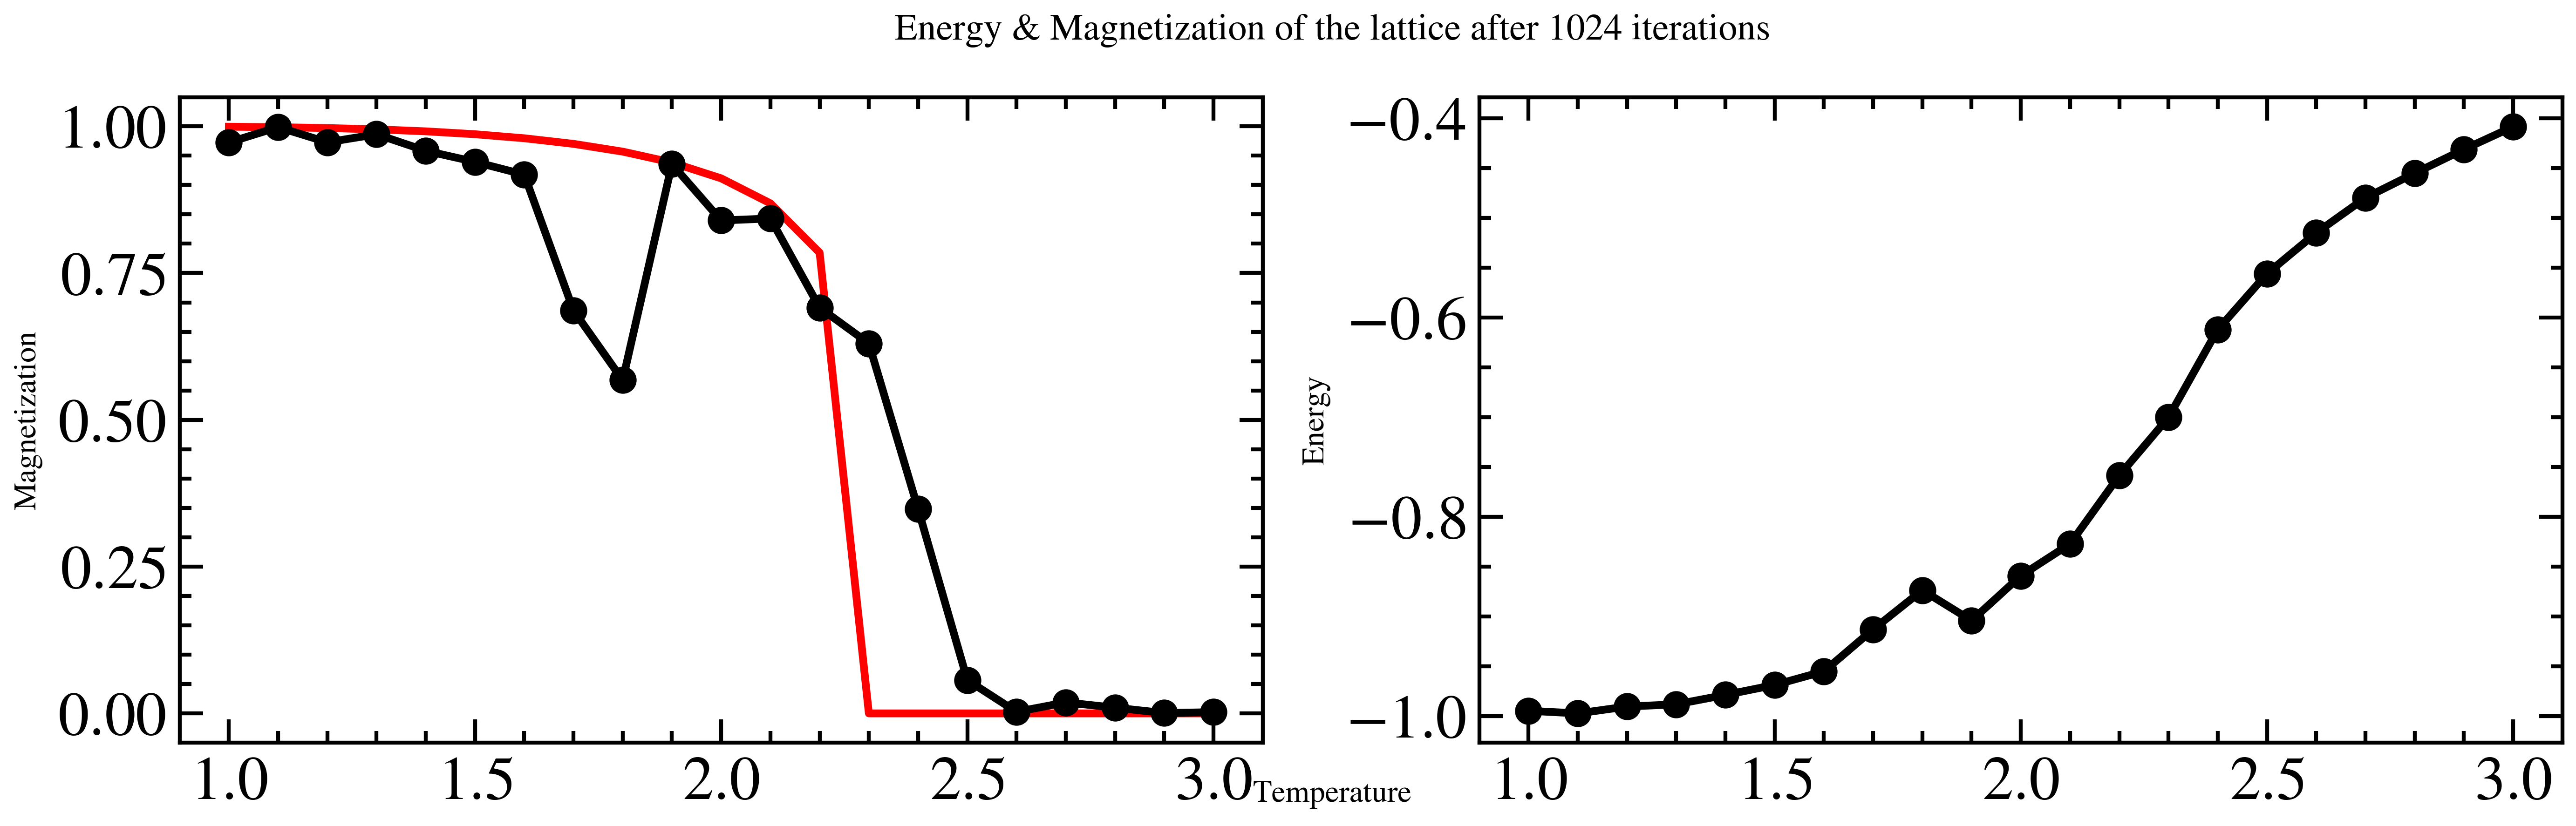

In [14]:
def analytical_magnetization(T):
    mag = np.zeros(len(T))
    for i,temp in enumerate(T):
        if temp < 2.26:
            mag[i] = math.pow((1.0-1.0/math.pow(math.sinh(2.0/temp),4)),1/8.0)
        else:
            None 
    return mag 
    
fig,ax = plt.subplots(1,2,sharex = True,figsize = (11,3))

fig.text(0.5, 0.04, 'Temperature', ha='center')
fig.suptitle(f'Energy & Magnetization of the lattice after {steps} iterations')

ax[0].plot(T,analytical_magnetization(T),'r',label = 'Analytic')
ax[0].plot(T,abs(M)/N**2,'-ok',label = 'Simulation')
ax[0].set_ylabel('Magnetization')


ax[1].plot(T,E/N**2,'-o')
ax[1].set_ylabel('Energy')